In [3]:
#First import the tools that are needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer


In [4]:
#Next import the TRAINING data

training = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/project-2/datasets/train.csv')
training.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [5]:
#Next important the SampleSub

samplesub = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/project-2/datasets/sample_sub_reg.csv')
samplesub.head(2)

,Id,SalePrice
0,2,181479.1217
1,4,181479.1217


In [6]:
#Next import the TEST Data
testing = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/project-2/datasets/test.csv')
testing.head(2)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [7]:
training['SalePrice'].mean()

181469.70160897123

In [8]:
#Add the mean saleprice to the testing column

testing['SalePrice'] = training['SalePrice'].mean()
testing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,181469.701609
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,181469.701609
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,181469.701609
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,181469.701609
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,185,0,NaN,NaN,NaN,0,7,2009,WD,181469.701609


In [9]:
#This remains the same???
testing[['Id', 'SalePrice']]

,Id,SalePrice
0,2658,181469.701609
1,2718,181469.701609
2,2414,181469.701609
3,1989,181469.701609
4,625,181469.701609
...,...,...
873,1662,181469.701609
874,1234,181469.701609
875,1373,181469.701609
876,1672,181469.701609


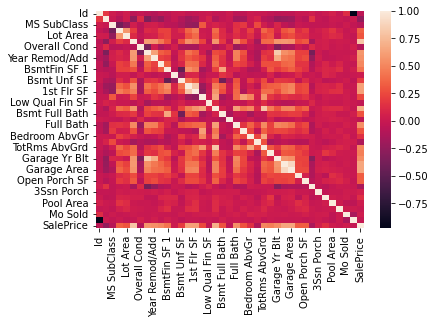

In [10]:
#See correlation model of the training set

sns.heatmap(training.corr());

#Features to try - Full bath, Garage Area


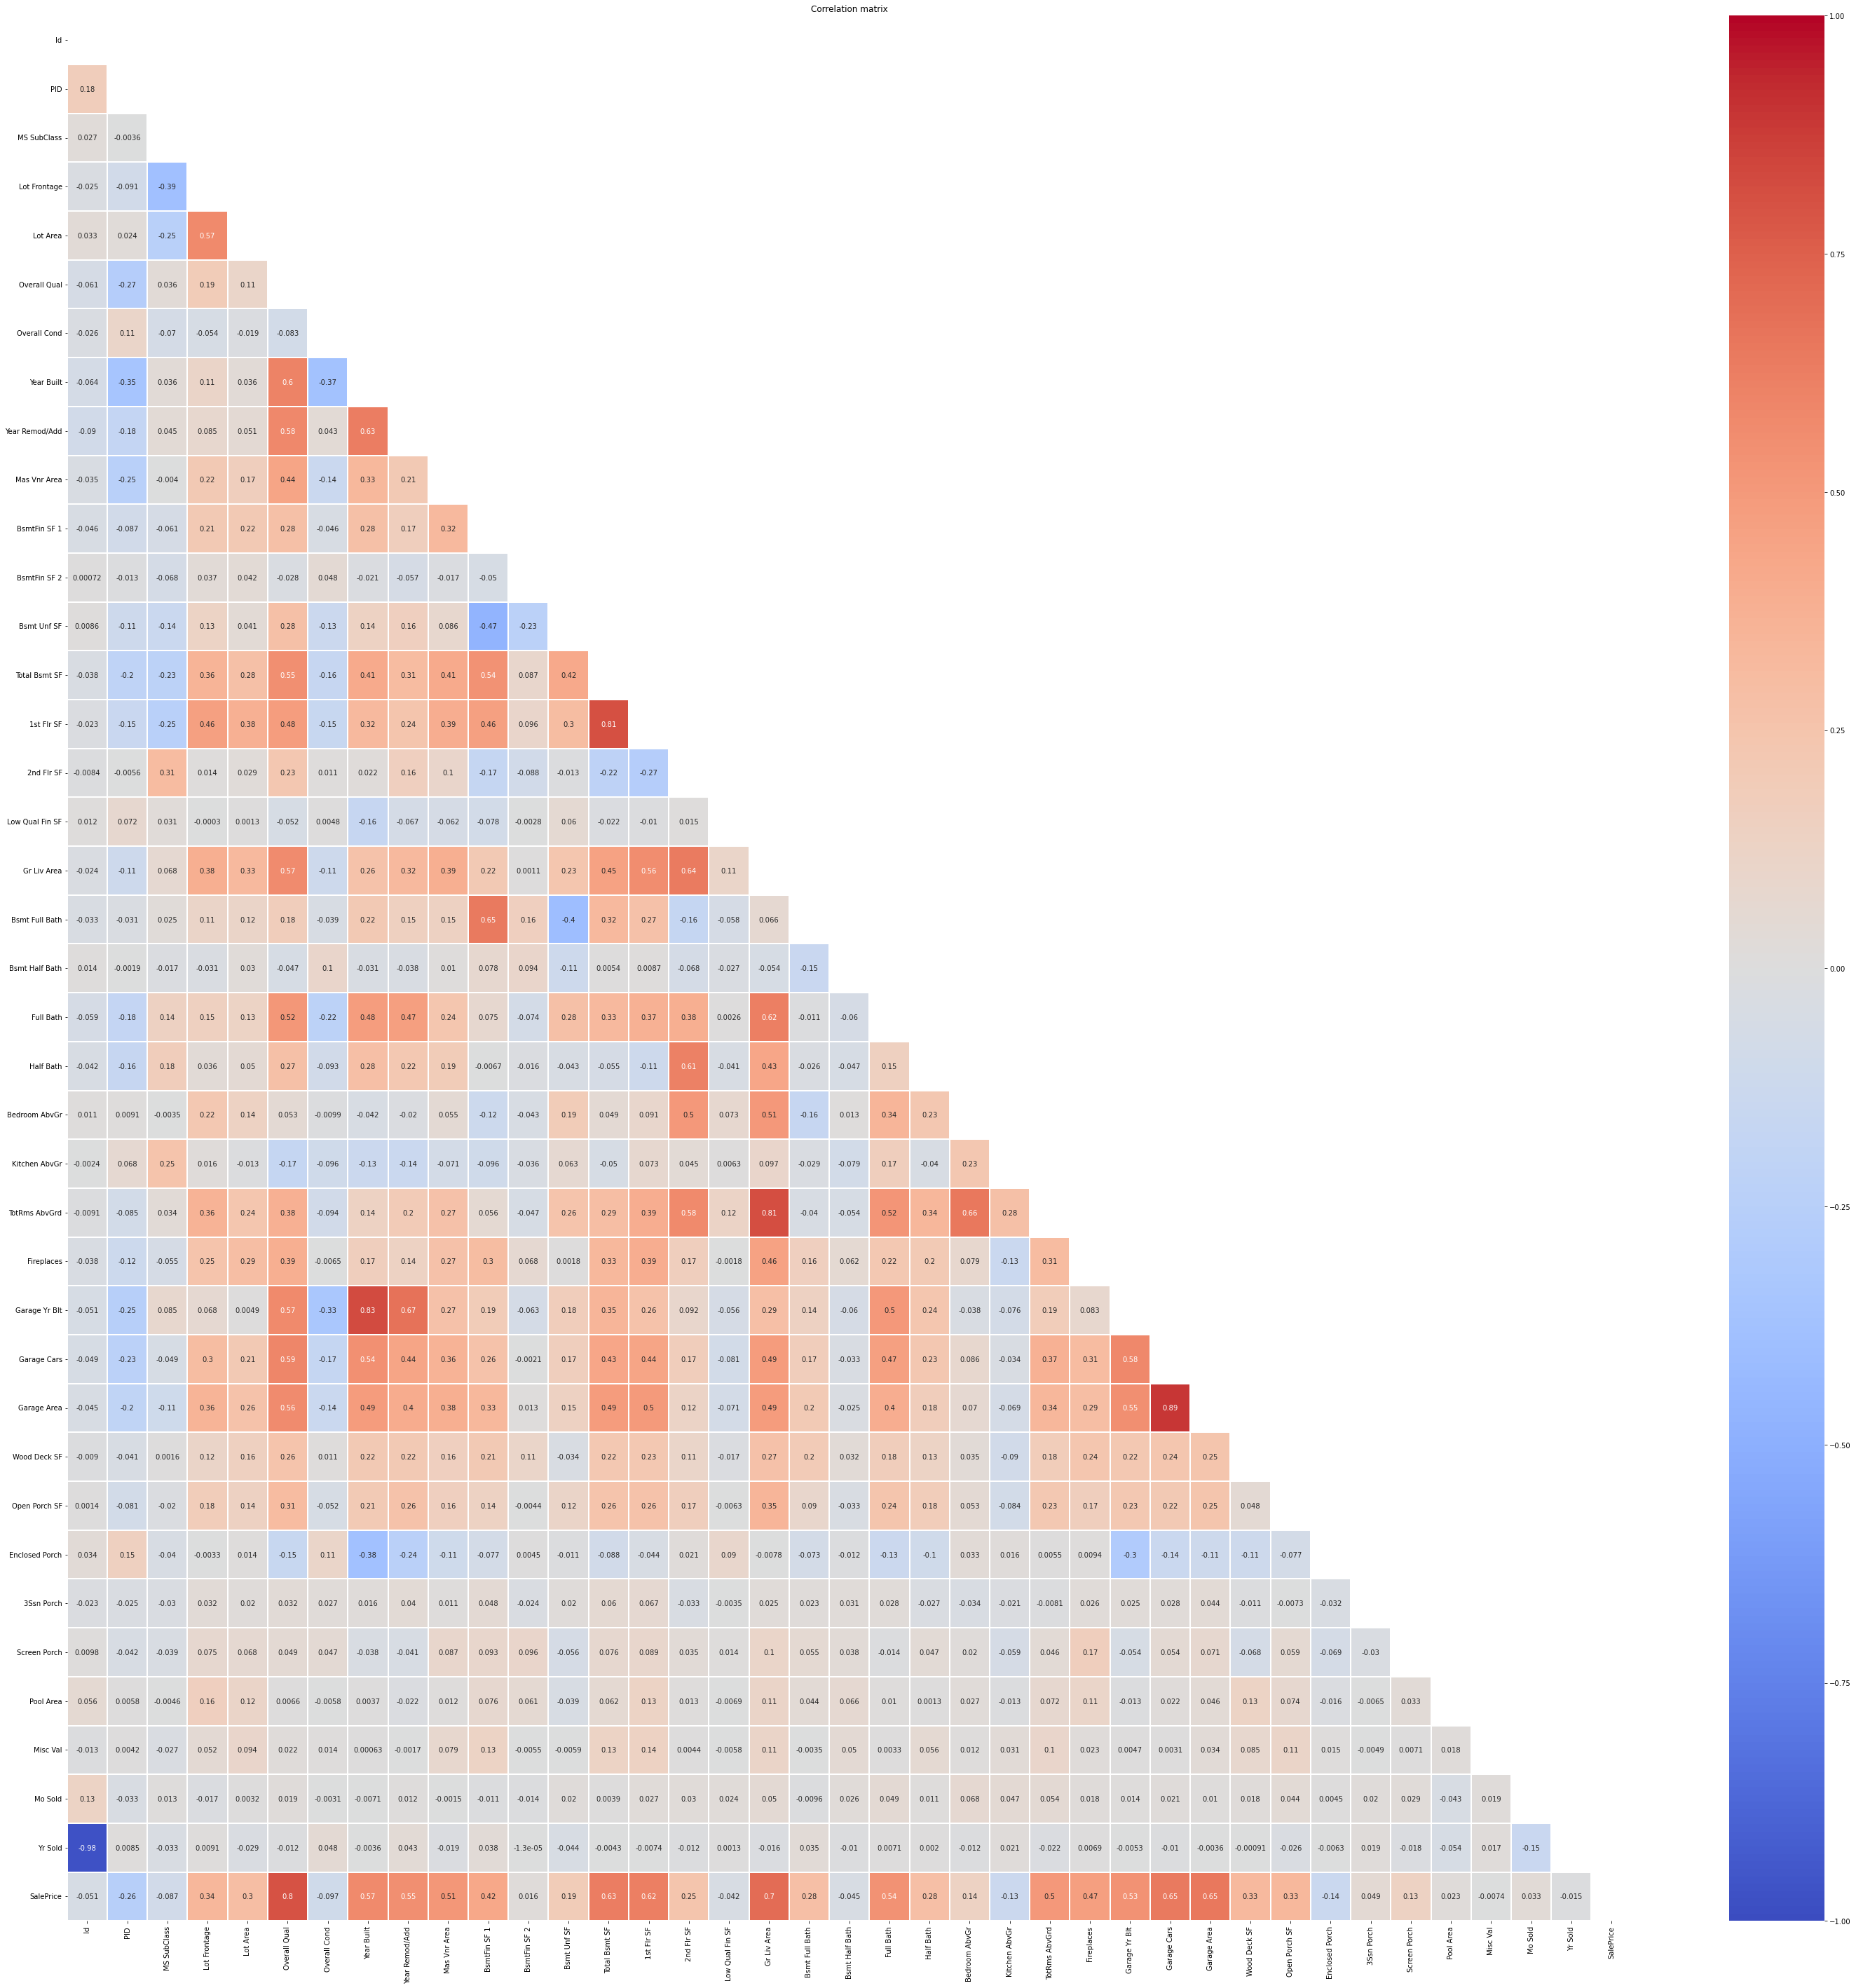

In [11]:
mask = np.zeros_like(training.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(50, 50))
sns.heatmap(
    training.corr(),
    cmap='coolwarm',
    annot=True,
    mask=mask,
    vmin=-1.,
    vmax=1.,
    linewidths=.1,
    center=0
)

plt.title('Correlation matrix'); 



In [12]:
lr = LinearRegression()

In [13]:
training['Full Bath'].isna().sum()

0

In [14]:
training['Garage Area'].isna().sum()

1

In [15]:
lr.fit(training[['Full Bath']], y = training['SalePrice'])

LinearRegression()

In [16]:
pred = lr.predict(testing[['Full Bath']])

In [17]:
pred

array([214284.07705121, 214284.07705121, 214284.07705121, 136657.45187009,
       136657.45187009, 136657.45187009, 136657.45187009, 136657.45187009,
       214284.07705121, 214284.07705121, 214284.07705121, 136657.45187009,
       136657.45187009, 369537.32741343, 136657.45187009, 136657.45187009,
       214284.07705121, 136657.45187009, 214284.07705121, 136657.45187009,
       136657.45187009, 136657.45187009, 214284.07705121, 136657.45187009,
       136657.45187009, 136657.45187009, 214284.07705121, 136657.45187009,
       136657.45187009, 136657.45187009, 136657.45187009, 136657.45187009,
       136657.45187009, 136657.45187009, 214284.07705121, 214284.07705121,
       136657.45187009, 136657.45187009, 136657.45187009, 214284.07705121,
       214284.07705121, 214284.07705121, 136657.45187009, 136657.45187009,
       214284.07705121, 136657.45187009, 214284.07705121, 136657.45187009,
       136657.45187009, 136657.45187009, 136657.45187009, 291910.70223232,
       214284.07705121, 1

In [18]:
testing['SalePrice'] = pred

In [19]:
testing[['Id', 'SalePrice']]

,Id,SalePrice
0,2658,214284.077051
1,2718,214284.077051
2,2414,214284.077051
3,1989,136657.451870
4,625,136657.451870
...,...,...
873,1662,214284.077051
874,1234,214284.077051
875,1373,136657.451870
876,1672,136657.451870


In [20]:
testing[['Id', 'SalePrice']].to_csv('Basic-LR-1F.csv', index=False)

In [ ]:
#How to find the RMSE of this model?
#Ask at flex time